In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
customers_df = pd.read_csv("Income Data.csv")
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
income    300 non-null float64
age       300 non-null float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
customers_df.head(5)

income    age
0  41100.0  48.75
1  54100.0  28.10
2  47800.0  46.75
3  19100.0  40.25
4  18200.0  35.80

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


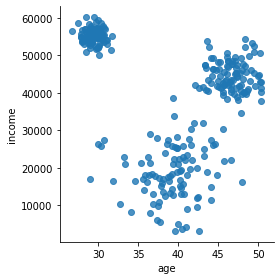

In [6]:
sn.lmplot("age","income",data = customers_df, fit_reg = False, size=4)

# K- Means clustering

In [7]:
from sklearn.cluster import KMeans

clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
customers_df["Cluster_id"] = clusters.labels_

In [10]:
customers_df[0:5]

income    age  Cluster_id
0  41100.0  48.75           0
1  54100.0  28.10           2
2  47800.0  46.75           0
3  19100.0  40.25           1
4  18200.0  35.80           1

# Now, plot the customer segmentation done with the above K-Means clustering tecchnique.

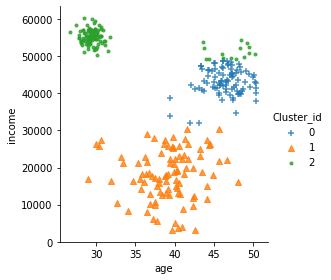

In [13]:
markers = ['+', '^', '.']

sn.lmplot("age","income", data = customers_df, hue = "Cluster_id", fit_reg = False, markers = markers, size = 4)

# Now, normalize the features and try segmenting again as the scales of age and income are different.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cust_df = scaler.fit_transform(customers_df[['age','income']])

scaled_cust_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [15]:
clusters_new = KMeans(3, random_state = 42)

clusters_new.fit(scaled_cust_df)

customers_df["clusterid_new"] = clusters_new.labels_




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


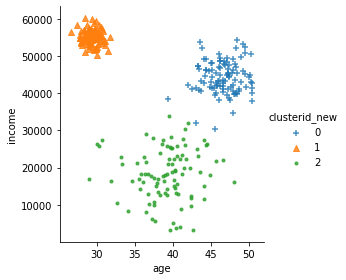

In [17]:
sn.lmplot("age","income", data = customers_df, hue = "clusterid_new", fit_reg = False, markers = markers, size = 4)

In [19]:
clusters_new.cluster_centers_

array([[ 1.08753708,  0.29682871],
       [-1.20817959,  0.97471684],
       [ 0.09073855, -1.32005197]])

# Cluster centers and interpreting the clusters
1. Cluster center explains the characteristic of the cluster and helps us to interpret the cluster.

In [20]:
customers_df.groupby('clusterid_new')['age','income'].agg(["mean","std"]).reset_index()

clusterid_new        age                  income             
                      mean       std          mean          std
0             0  46.627184  2.151559  44308.737864  4390.321503
1             1  29.384000  0.921458  55204.000000  1951.943864
2             2  39.140206  3.558665  18321.649485  6924.747691

In [22]:
# according to the code in book. he took original data centroids here. not the scaled data. 
customers_df.groupby('Cluster_id')['age','income'].agg(["mean","std"]).reset_index()

Cluster_id        age                  income             
                   mean       std          mean          std
0          0  46.419101  2.289620  43053.932584  3613.769632
1          1  39.174479  3.626068  18144.791667  6745.241906
2          2  31.700435  6.122122  54675.652174  2362.224320